Available Libraries: ['quant_data_v1']

[Success] Loaded 333 bars for SPY!
                             open    high     low   close   volume  average  \
date                                                                          
2025-12-05 22:00:00+00:00  685.95  686.05  685.67  685.85  94017.0  685.928   
2025-12-05 23:00:00+00:00  685.90  686.03  685.71  685.85  21837.0  685.848   
2025-12-06 00:00:00+00:00  685.80  685.99  685.80  685.97  21339.0  685.917   

                           barCount  
date                                 
2025-12-05 22:00:00+00:00       437  
2025-12-05 23:00:00+00:00       155  
2025-12-06 00:00:00+00:00       215  


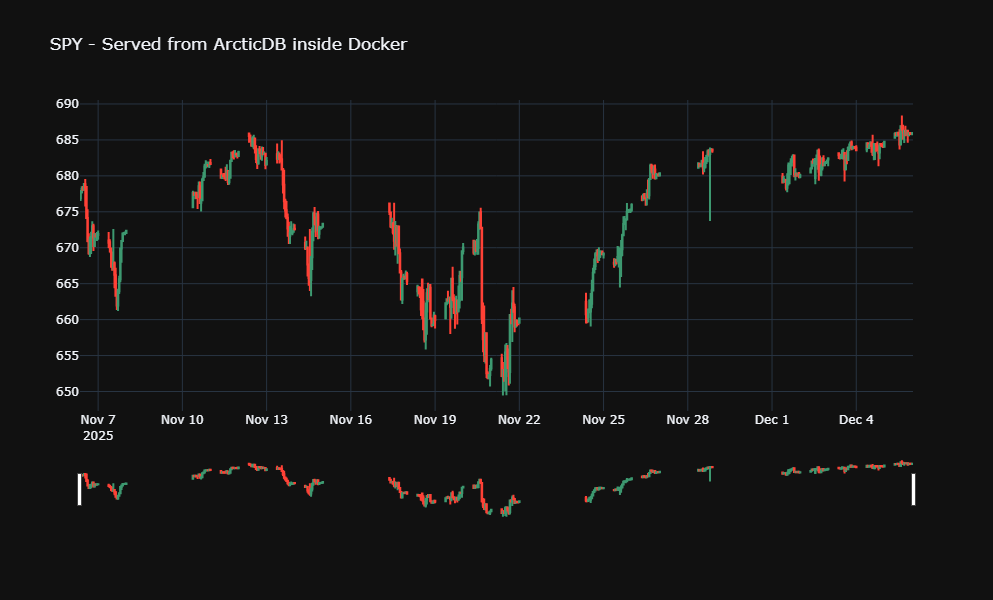

In [1]:
import arcticdb as adb
import pandas as pd
import plotly.graph_objects as go

# --- 1. Connect to the Vault ---
# Critical: Inside Docker, we look at '/app/data', not the Windows path.
store = adb.Arctic("lmdb:///app/data") 

# List libraries to prove we are connected
print("Available Libraries:", store.list_libraries())

# --- 2. Load the SPY Data ---
lib = store["quant_data_v1"]
symbol = "SPY"

if lib.has_symbol(symbol):
    df = lib.read(symbol).data
    print(f"\n[Success] Loaded {len(df)} bars for {symbol}!")
    print(df.tail(3))
else:
    print(f"\n[Error] Could not find {symbol} in the database.")

# --- 3. Visualize (The 'Proof of Life') ---
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'], high=df['high'], low=df['low'], close=df['close']
)])

fig.update_layout(
    title=f"{symbol} - Served from ArcticDB inside Docker", 
    template="plotly_dark",
    height=600
)

fig.show()